<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Wrangling-with-Pandas" data-toc-modified-id="Data-Wrangling-with-Pandas-1">Data Wrangling with Pandas</a></span><ul class="toc-item"><li><span><a href="#Date/Time-data-handling" data-toc-modified-id="Date/Time-data-handling-1.1">Date/Time data handling</a></span></li><li><span><a href="#Merging-and-joining-DataFrame-objects" data-toc-modified-id="Merging-and-joining-DataFrame-objects-1.2">Merging and joining DataFrame objects</a></span><ul class="toc-item"><li><span><a href="#Exercise-6" data-toc-modified-id="Exercise-6-1.2.1">Exercise 6</a></span></li></ul></li><li><span><a href="#Concatenation" data-toc-modified-id="Concatenation-1.3">Concatenation</a></span></li><li><span><a href="#Reshaping-DataFrame-objects" data-toc-modified-id="Reshaping-DataFrame-objects-1.4">Reshaping DataFrame objects</a></span></li><li><span><a href="#Pivoting" data-toc-modified-id="Pivoting-1.5">Pivoting</a></span></li><li><span><a href="#Data-transformation" data-toc-modified-id="Data-transformation-1.6">Data transformation</a></span><ul class="toc-item"><li><span><a href="#Dealing-with-duplicates" data-toc-modified-id="Dealing-with-duplicates-1.6.1">Dealing with duplicates</a></span></li><li><span><a href="#Value-replacement" data-toc-modified-id="Value-replacement-1.6.2">Value replacement</a></span></li><li><span><a href="#Inidcator-variables" data-toc-modified-id="Inidcator-variables-1.6.3">Inidcator variables</a></span></li></ul></li><li><span><a href="#Categorical-Data" data-toc-modified-id="Categorical-Data-1.7">Categorical Data</a></span><ul class="toc-item"><li><span><a href="#Discretization" data-toc-modified-id="Discretization-1.7.1">Discretization</a></span></li><li><span><a href="#Permutation-and-sampling" data-toc-modified-id="Permutation-and-sampling-1.7.2">Permutation and sampling</a></span></li></ul></li><li><span><a href="#Data-aggregation-and-GroupBy-operations" data-toc-modified-id="Data-aggregation-and-GroupBy-operations-1.8">Data aggregation and GroupBy operations</a></span><ul class="toc-item"><li><span><a href="#Apply" data-toc-modified-id="Apply-1.8.1">Apply</a></span></li><li><span><a href="#Exercise-7" data-toc-modified-id="Exercise-7-1.8.2">Exercise 7</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-1.9">References</a></span></li></ul></li></ul></div>

# Data Wrangling with Pandas

Now that we have been exposed to the basic functionality of Pandas, let's explore some more advanced features that will be useful when addressing more complex data management tasks.

As most statisticians/data analysts will admit, often the lion's share of the time spent implementing an analysis is devoted to preparing the data itself, rather than to coding or running a particular model that uses the data. This is where Pandas and  Python's standard library are beneficial, providing high-level, flexible, and efficient tools for manipulating your data as needed.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

## Date/Time data handling

Date and time data are inherently problematic. There are an unequal number of days in every month, an unequal number of days in a year (due to leap years), and time zones that vary over space. Yet information about time is essential in many analyses, particularly in the case of time series analysis.

The `datetime` built-in library handles temporal information down to the nanosecond.

In [3]:
from datetime import datetime, date, time

In [4]:
now = datetime.now()
now

datetime.datetime(2019, 9, 28, 1, 34, 57, 882646)

In [5]:
date(1970, 9, 3)

datetime.date(1970, 9, 3)

Having a custom data type for dates and times is convenient because we can perform operations on them easily. For example, we may want to calculate the difference between two times:

In [7]:
my_age = now - datetime(1996, 5, 30)
my_age.days/365

23.345205479452055

In this section, we will manipulate data collected from ocean-going vessels on the eastern seaboard. Vessel operations are monitored using the Automatic Identification System (AIS), a safety at sea navigation technology which vessels are required to maintain and that uses transponders to transmit very high frequency (VHF) radio signals containing static information including ship name, call sign, and country of origin, as well as dynamic information unique to a particular voyage such as vessel location, heading, and speed. 

The International Maritime Organization’s (IMO) International Convention for the Safety of Life at Sea requires functioning AIS capabilities on all vessels 300 gross tons or greater and the US Coast Guard requires AIS on nearly all vessels sailing in U.S. waters. The Coast Guard has established a national network of AIS receivers that provides coverage of nearly all U.S. waters. AIS signals are transmitted several times each minute and the network is capable of handling thousands of reports per minute and updates as often as every two seconds. Therefore, a typical voyage in our study might include the transmission of hundreds or thousands of AIS encoded signals. This provides a rich source of spatial data that includes both spatial and temporal information.

For our purposes, we will use summarized data that describes the transit of a given vessel through a particular administrative area. The data includes the start and end time of the transit segment, as well as information about the speed of the vessel, how far it travelled, etc.

In [10]:
segments = pd.read_csv("Data/transit_segments.csv")
segments.head()

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27
1,1,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,4/6/09 14:31,4/6/09 15:20
2,1,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,4/6/09 14:36,4/6/09 14:55
3,1,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,4/10/09 17:58,4/10/09 18:34
4,1,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,4/10/09 17:59,4/10/09 18:35


For example, we might be interested in the distribution of transit lengths, so we can plot them as a histogram:

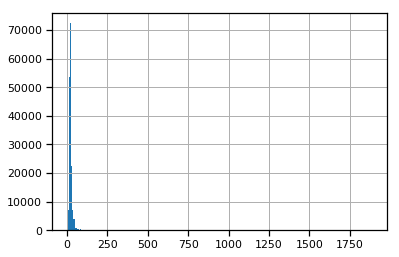

In [11]:
segments.seg_length.hist(bins=500)

Though most of the transits appear to be short, there are a few longer distances that make the plot difficult to read. This is where a transformation is useful:

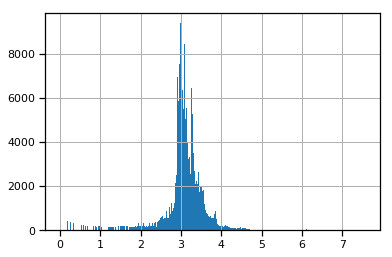

In [12]:
segments.seg_length.apply(np.log).hist(bins=500)

We can see that although there are date/time fields in the dataset, they are not in any specialized format, such as `datetime`.

Our first order of business will be to convert these data to `datetime`. The `strptime` method parses a string representation of a date and/or time field, according to the expected format of this information.

In [13]:
datetime.strptime(segments.st_time.iloc[0], '%m/%d/%y %H:%M')

datetime.datetime(2009, 2, 10, 16, 3)

The `dateutil` package includes a parser that attempts to detect the format of the date strings, and convert them automatically.

In [14]:
from dateutil.parser import parse

In [15]:
parse(segments.st_time.iloc[0])

datetime.datetime(2009, 2, 10, 16, 3)

We can convert all the dates in a particular column by using the `apply` method.

In [16]:
segments.st_time.apply(lambda d: datetime.strptime(d, '%m/%d/%y %H:%M')).head(10)

0   2009-02-10 16:03:00
1   2009-04-06 14:31:00
2   2009-04-06 14:36:00
3   2009-04-10 17:58:00
4   2009-04-10 17:59:00
5   2010-03-20 16:06:00
6   2010-03-20 18:05:00
7   2011-05-04 11:28:00
8   2010-06-05 11:23:00
9   2010-06-08 11:03:00
Name: st_time, dtype: datetime64[ns]

As a convenience, Pandas has a `to_datetime` method that will parse and convert an entire `Series` of formatted strings into `datetime` objects.

In [17]:
pd.to_datetime(segments.st_time[:10])

0   2009-02-10 16:03:00
1   2009-04-06 14:31:00
2   2009-04-06 14:36:00
3   2009-04-10 17:58:00
4   2009-04-10 17:59:00
5   2010-03-20 16:06:00
6   2010-03-20 18:05:00
7   2011-05-04 11:28:00
8   2010-06-05 11:23:00
9   2010-06-08 11:03:00
Name: st_time, dtype: datetime64[ns]

Pandas also has a custom NA value for missing datetime objects, `NaT`.

In [18]:
pd.to_datetime([None])

DatetimeIndex(['NaT'], dtype='datetime64[ns]', freq=None)

Also, if `to_datetime()` has problems parsing any particular date/time format, you can pass the spec in using the `format=` argument.

The `read_*` functions now have an optional `parse_dates` argument that try to convert any columns passed to it into `datetime` format upon import:

In [19]:
segments = pd.read_csv("Data/transit_segments.csv", parse_dates=['st_time', 'end_time'], nrows=1000)

In [20]:
segments.dtypes

mmsi                   int64
name                  object
transit                int64
segment                int64
seg_length           float64
avg_sog              float64
min_sog              float64
max_sog              float64
pdgt10               float64
st_time       datetime64[ns]
end_time      datetime64[ns]
dtype: object

Columns of the `datetime` type have an **accessor** to easily extract properties of the data type. This will return a `Series`, with the same row index as the `DataFrame`. For example:

In [21]:
segments.st_time.dt.month.head()

0    2
1    4
2    4
3    4
4    4
Name: st_time, dtype: int64

This can be used to easily filter rows by particular temporal attributes:

In [22]:
segments[segments.st_time.dt.month==2].head()

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,2009-02-10 16:27:00
78,3011,Charleston,16,1,18.9,0.3,0.0,16.1,0.5,2010-02-07 07:26:00,2010-02-09 19:27:00
79,3011,Charleston,17,1,19.2,0.3,0.0,6.4,0.0,2010-02-11 16:56:00,2010-02-14 14:31:00
80,3011,Charleston,18,1,24.7,0.3,0.0,5.7,0.0,2010-02-19 11:53:00,2010-02-22 16:50:00
81,3011,Charleston,19,1,40.1,0.4,0.0,16.3,0.1,2010-02-23 15:15:00,2010-03-02 14:25:00


## Merging and joining DataFrame objects

Now that we have the vessel transit information as we need it, we may want a little more information regarding the vessels themselves. In the `data/AIS` folder there is a second table that contains information about each of the ships that traveled the segments in the `segments` table.

In [23]:
vessels = pd.read_csv("Data/vessel_information.csv", index_col='mmsi')
vessels.head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
9,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62.0,2,Pleasure/Tug
21,1,Us Gov Vessel,Y,Unknown,Unknown,1,208.0,208.0,1,Unknown
74,2,Mcfaul/Sarah Bell,N,Unknown,Unknown,1,155.0,155.0,1,Unknown
103,3,Ron G/Us Navy Warship 103/Us Warship 103,Y,Unknown,Unknown,2,26.0/155.0,155.0,2,Tanker/Unknown


The challenge is that several ships have travelled multiple segments, so there is not a one-to-one relationship between the rows of the two tables. **The table of vessel information has a *one-to-many* relationship with the segments**.

In Pandas, we can combine tables according to the value of one or more *keys* that are used to identify rows, much like an index. Using a trivial example:

In [24]:
df1 = pd.DataFrame(dict(id=range(4), age=np.random.randint(18, 31, size=4)))
df2 = pd.DataFrame(dict(id=list(range(3))+list(range(3)), 
                        score=np.random.random(size=6)))

df1

,id,age
0,0,20
1,1,29
2,2,28
3,3,27


In [26]:
df2

,id,score
0,0,0.477250
1,1,0.528814
2,2,0.140041
3,0,0.352242
4,1,0.626354
5,2,0.344541


In [25]:
pd.merge(df1, df2)

,id,age,score
0,0,20,0.477250
1,0,20,0.352242
2,1,29,0.528814
3,1,29,0.626354
4,2,28,0.140041
5,2,28,0.344541


Notice that without any information about which column to use as a key, Pandas did the right thing and used the `id` column in both tables. Unless specified otherwise, `merge` will used any common column names as keys for merging the tables. 

Notice also that `id=3` from `df1` was omitted from the merged table. This is because, by default, `merge` performs an **inner join** on the tables, meaning that the merged table represents an intersection of the two tables.

In [27]:
pd.merge(df1, df2, how='outer')

,id,age,score
0,0,20,0.477250
1,0,20,0.352242
2,1,29,0.528814
3,1,29,0.626354
4,2,28,0.140041
5,2,28,0.344541
6,3,27,NaN


The **outer join** above yields the union of the two tables, so all rows are represented, with missing values inserted as appropriate. One can also perform **right** and **left** joins to include all rows of the right or left table (*i.e.* first or second argument to `merge`), but not necessarily the other.

Looking at the two datasets that we wish to merge:

In [28]:
segments.head(1)

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,2009-02-10 16:27:00


In [29]:
vessels.head(1)

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing


we see that there is a `mmsi` value (a vessel identifier) in each table, but it is used as an index for the `vessels` table. In this case, we have to specify to join on the index for this table, and on the `mmsi` column for the other.

In [30]:
segments_merged = pd.merge(vessels, segments, left_index=True, right_on='mmsi')

In [33]:
segments_merged.head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type,...,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,2009-02-10 16:27:00
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,2009-04-06 14:31:00,2009-04-06 15:20:00
2,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,2009-04-06 14:36:00,2009-04-06 14:55:00
3,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,2009-04-10 17:58:00,2009-04-10 18:34:00
4,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,2009-04-10 17:59:00,2009-04-10 18:35:00


In this case, the default inner join is suitable; we are not interested in observations from either table that do not have corresponding entries in the other. 

Notice that `mmsi` field that was an index on the `vessels` table is no longer an index on the merged table.

Here, we used the `merge` function to perform the merge; we could also have used the `merge` *method* for either of the tables:

In [34]:
vessels.merge(segments, left_index=True, right_on='mmsi').head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type,...,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,2009-02-10 16:27:00
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,2009-04-06 14:31:00,2009-04-06 15:20:00
2,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,2009-04-06 14:36:00,2009-04-06 14:55:00
3,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,2009-04-10 17:58:00,2009-04-10 18:34:00
4,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,2009-04-10 17:59:00,2009-04-10 18:35:00


Occasionally, there will be fields with the same in both tables that we do not wish to use to join the tables; they may contain different information, despite having the same name. In this case, Pandas will by default append suffixes `_x` and `_y` to the columns to uniquely identify them.

In [42]:
segments['type'] = 'foo'
merged = pd.merge(vessels, segments, left_index=True, right_on='mmsi').head()

This behavior can be overridden by specifying a `suffixes` argument, containing a list of the suffixes to be used for the columns of the left and right columns, respectively.

### Exercise 6
Fix the following `merge` in order to return a non-empty `DataFrame`.

## Concatenation

A common data manipulation is appending rows or columns to a dataset that already conform to the dimensions of the exsiting rows or colums, respectively:

In [ ]:
np.concatenate([np.random.random(5), np.random.random(5)])

This operation is also called *binding* or *stacking*.

With Pandas' indexed data structures, there are additional considerations as the overlap in index values between two data structures affects how they are concatenate.

Lets import two microbiome datasets, each consisting of counts of microorganiams from a particular patient. We will use the first column of each dataset as the index.

In [ ]:
mb1 = pd.read_excel('Data/microbiome_MID1.xls', 'Sheet 1', index_col=0, header=None)
mb2 = pd.read_excel('Data/microbiome_MID2.xls', 'Sheet 1', index_col=0, header=None)
mb1.columns = mb2.columns = ['Count']
mb1.index.name = mb2.index.name = 'Taxon'
mb1.shape, mb2.shape

In [ ]:
mb1.head()

The index of these data is the unique biological classification of each organism, beginning with *domain*, *phylum*, *class*, and for some organisms, going all the way down to the genus level.

![classification](http://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Biological_classification_L_Pengo_vflip.svg/150px-Biological_classification_L_Pengo_vflip.svg.png)

In [ ]:
mb1.index.is_unique

If we concatenate along `axis=0` (the default), we will obtain another data frame with the the rows concatenated:

In [ ]:
pd.concat([mb1, mb2], axis=0).head()

However, the index is no longer unique, due to overlap between the two `DataFrames`.

In [ ]:
pd.concat([mb1, mb2], axis=0).index.is_unique

Concatenating along `axis=1` will concatenate column-wise, but respecting the indices of the two `DataFrames`.

In [ ]:
pd.concat([mb1, mb2], axis=1).shape

In [ ]:
pd.concat([mb1, mb2], axis=1).head()

## Reshaping DataFrame objects

In the context of a single DataFrame, we are often interested in re-arranging the layout of our data. 

This dataset is from Table 6.9 of [Statistical Methods for the Analysis of Repeated Measurements](http://www.amazon.com/Statistical-Methods-Analysis-Repeated-Measurements/dp/0387953701) by Charles S. Davis, pp. 161-163 (Springer, 2002). These data are from a multicenter, randomized controlled trial of botulinum toxin type B (BotB) in patients with cervical dystonia from nine U.S. sites.

* Randomized to placebo (N=36), 5000 units of BotB (N=36), 10,000 units of BotB (N=37)
* Response variable: total score on Toronto Western Spasmodic Torticollis Rating Scale (TWSTRS), measuring severity, pain, and disability of cervical dystonia (high scores mean more impairment)
* TWSTRS measured at baseline (week 0) and weeks 2, 4, 8, 12, 16 after treatment began

In [ ]:
cdystonia = pd.read_csv("Data/cdystonia.csv", index_col=None)
cdystonia.head()

This dataset includes repeated measurements of the same individuals (longitudinal data). Its possible to present such information in (at least) two ways: showing each repeated measurement in their own row, or in multiple columns representing multiple measurements.


The `stack` method rotates the data frame so that columns are represented in rows:

In [ ]:
stacked = cdystonia.stack()
stacked.head(15)

To complement this, `unstack` pivots from rows back to columns.

In [ ]:
stacked.unstack().head()

For this dataset, it makes sense to create a hierarchical index based on the patient and observation:

## Pivoting

The `pivot` method allows a DataFrame to be transformed easily between long and wide formats in the same way as a pivot table is created in a spreadsheet. It takes three arguments: `index`, `columns` and `values`, corresponding to the DataFrame index (the row headers), columns and cell values, respectively.

For example, we may want the `twstrs` variable (the response variable) in wide format according to patient, as we saw with the unstacking method above:

In [ ]:
twstrs_wide = cdystonia.pivot(index='patient', columns='obs', values='twstrs').head()
twstrs_wide

In [ ]:
cdystonia_wide = (cdystonia[['patient','site','id','treat','age','sex']]
                  .drop_duplicates()
                  .merge(twstrs_wide, right_index=True, left_on='patient', how='inner')
                  .head())
cdystonia_wide

To convert our "wide" format back to long, we can use the `melt` function, appropriately parameterized. This function is useful for `DataFrame`s where one
or more columns are identifier variables (`id_vars`), with the remaining columns being measured variables (`value_vars`). The measured variables are "unpivoted" to
the row axis, leaving just two non-identifier columns, a *variable* and its corresponding *value*, which can both be renamed using optional arguments.

In [ ]:
pd.melt(cdystonia_wide, id_vars=['patient','site','id','treat','age','sex'], var_name='obs', value_name='twsters').head()

This illustrates the two formats for longitudinal data: **long** and **wide** formats. Its typically better to store data in long format because additional data can be included as additional rows in the database, while wide format requires that the entire database schema be altered by adding columns to every row as data are collected.

The preferable format for analysis depends entirely on what is planned for the data, so it is imporant to be able to move easily between them.

A related method, `pivot_table`, creates a spreadsheet-like table with a hierarchical index, and allows the values of the table to be populated using an arbitrary aggregation function.

In [ ]:
cdystonia.pivot_table(index=['site', 'treat'], columns='week', values='twstrs', aggfunc=max).head(10)

For a simple cross-tabulation of group frequencies, the `crosstab` function (not a method) aggregates counts of data according to factors in rows and columns. The factors may be hierarchical if desired.

In [ ]:
pd.crosstab(cdystonia.sex, cdystonia.site)

## Data transformation

There are a slew of additional operations for DataFrames that we would collectively refer to as "transformations" which include tasks such as removing duplicate values, replacing values, and grouping values.

### Dealing with duplicates

We can easily identify and remove duplicate values from `DataFrame` objects. For example, say we want to removed ships from our `vessels` dataset that have the same name:

In [ ]:
vessels.duplicated(subset='names').head(30)

In [ ]:
vessels.drop_duplicates(['names']).head()

### Value replacement

Frequently, we get data columns that are encoded as strings that we wish to represent numerically for the purposes of including it in a quantitative analysis. For example, consider the treatment variable in the cervical dystonia dataset:

In [ ]:
cdystonia.treat.value_counts()

A logical way to specify these numerically is to change them to integer values, perhaps using "Placebo" as a baseline value. If we create a dict with the original values as keys and the replacements as values, we can pass it to the `map` method to implement the changes.

In [ ]:
cdystonia['treatment'] = cdystonia.treat.map({'Placebo': 0, '5000U': 1, '10000U': 2})
cdystonia.treatment.head(10)

We can also perform the same replacement that we used `map` for with `replace`:

In [ ]:
cdystonia.treat.replace({0:'Placebo', 1:'5000U', 2:'10000U'}).head(10)

### Inidcator variables

For some statistical analyses (*e.g.* regression models or analyses of variance), categorical or group variables need to be converted into columns of indicators--zeros and ones--to create a so-called **design matrix**. The Pandas function `get_dummies` (indicator variables are also known as *dummy variables*) makes this transformation straightforward.

In [ ]:
pd.get_dummies(vessels.head(10).type)

## Categorical Data

Pandas provides a convenient `dtype` for reprsenting categorical (factor) data, called `category`. 

For example, the `treat` column in the cervical dystonia dataset represents three treatment levels in a clinical trial, and is imported by default as an `object` type, since it is a mixture of string characters.

In [ ]:
cdystonia.treat.head()

We can convert this to a `category` type either by the `Categorical` constructor, or casting the column using `astype`:

In [ ]:
pd.Categorical(cdystonia.treat)

In [ ]:
cdystonia['treat'] = cdystonia.treat.astype('category')

In [ ]:
cdystonia.treat.describe()

The important difference between the `category` type and the `object` type is that `category` is represented by an <b>underlying array of integers</b>, which is then mapped to character labels.

In [ ]:
cdystonia.treat.cat.codes.head(20)

Notice that these are 8-bit integers, which are essentially single bytes of data, making memory usage lower.

There is also a performance benefit. Consider an operation such as calculating the total segment lengths for each ship in the `segments` table (this is also a preview of pandas' `groupby` operation!):

In [ ]:
%time segments.groupby(segments.name).seg_length.sum().sort_values(ascending=False, inplace=False).head()

In [ ]:
segments['name'] = segments.name.astype('category')

In [ ]:
%time segments.groupby(segments.name).seg_length.sum().sort_values(ascending=False, inplace=False).head()

Hence, we get a considerable speedup simply by using the appropriate `dtype` for our data.

### Discretization

Pandas' `cut` function can be used to group continuous or countable data in to bins. Discretization is generally a very **bad idea** for statistical analysis, so use this function responsibly!

Lets say we want to bin the ages of the cervical dystonia patients into a smaller number of groups:

In [ ]:
cdystonia.age.describe()

Let's transform these data into decades, beginnnig with individuals in their 20's and ending with those in their 80's:

In [ ]:
pd.cut(cdystonia.age, [20,30,40,50,60,70,80,90])[:20]

The parentheses indicate an open interval, meaning that the interval includes values up to but *not including* the endpoint, whereas the square bracket is a closed interval, where the endpoint is included in the interval. We can switch the closure to the left side by setting the `right` flag to `False`:

In [ ]:
pd.cut(cdystonia.age, [20,30,40,50,60,70,80,90], right=False)[:20]

Since the data are now **ordinal**, rather than numeric, we can give them labels:

In [ ]:
pd.cut(cdystonia.age, [20,40,60,80,90], labels=['young','middle-aged','old','really old'])[:20]

A related function `qcut` uses empirical quantiles to divide the data. If, for example, we want the quartiles -- (0-25%], (25-50%], (50-70%], (75-100%] -- we can just specify 4 intervals, which will be equally-spaced by default:

In [ ]:
pd.qcut(cdystonia.age, 4)[:20]

Alternatively, one can specify custom quantiles to act as cut points:

In [ ]:
quantiles = pd.qcut(segments.seg_length, [0, 0.01, 0.05, 0.95, 0.99, 1])
quantiles[:20]

### Permutation and sampling

For some data analysis tasks, such as simulation, we need to be able to randomly reorder our data, or draw random values from it. Calling NumPy's `permutation` function with the length of the sequence you want to permute generates an array with a permuted sequence of integers, which can be used to re-order the sequence.

In [ ]:
new_order = np.random.permutation(len(segments))
new_order[:30]

Using this sequence as an argument to the `take` method results in a reordered DataFrame:

In [ ]:
segments.take(new_order).head()

Compare this ordering with the original:

In [ ]:
segments.head()

For random sampling, `DataFrame` and `Series` objects have a `sample` method that can be used to draw samples, with or without replacement:

In [ ]:
vessels.sample(n=10)

In [ ]:
vessels.sample(n=10, replace=True)

## Data aggregation and GroupBy operations

One of the most powerful features of Pandas is its **GroupBy** functionality. On some occasions we may want to perform operations on *groups* of observations within a dataset. For example:

* **aggregation**, such as computing the sum of mean of each group, which involves applying a function to each group and returning the aggregated results
* **slicing** the DataFrame into groups and then doing something with the resulting slices (*e.g.* plotting)
* group-wise **transformation**, such as standardization/normalization

In [ ]:
cdystonia_grouped = cdystonia.groupby(cdystonia.patient)

However, the grouping is only an intermediate step; for example, we may want to **iterate** over each of the patient groups:

In [ ]:
for patient, group in cdystonia_grouped:
    print('patient', patient)
    print('group', group)

A common data analysis procedure is the **split-apply-combine** operation, which groups subsets of data together, applies a function to each of the groups, then recombines them into a new data table.

For example, we may want to aggregate our data with with some function.

![split-apply-combine](http://f.cl.ly/items/0s0Z252j0X0c3k3P1M47/Screen%20Shot%202013-06-02%20at%203.04.04%20PM.png)

<div align="right">*(figure taken from "Python for Data Analysis", p.251)*</div>

We can aggregate in Pandas using the `aggregate` (or `agg`, for short) method:

In [ ]:
cdystonia_grouped.mean().head()

Notice that the `treat` and `sex` variables are <b>not included in the aggregation</b>. Since it does not make sense to aggregate string variables, these columns are simply ignored by the method.

Some aggregation functions are so common that Pandas has a convenience method for them, such as `mean`:

The `add_prefix` and `add_suffix` methods can be used to give the columns of the resulting table labels that reflect the transformation:

In [ ]:
cdystonia_grouped.mean().add_suffix('_mean').head()

In [ ]:
# The median of the `twstrs` variable
cdystonia_grouped['twstrs'].quantile(0.5).head(10)

If we wish, we can easily aggregate according to multiple keys:

In [ ]:
cdystonia.groupby(['week','site']).mean().head()

### Apply

We can generalize the split-apply-combine methodology by using `apply` function. This allows us to invoke any function we wish on a grouped dataset and recombine them into a DataFrame.

The function below takes a DataFrame and a column name, sorts by the column, and takes the `n` largest values of that column. We can use this with `apply` to return the largest values from every group in a DataFrame in a single call. 

In [ ]:
def top(df, column, n=5):
    return df.sort_values(by=column, ascending=False)[:n]

To see this in action, consider the vessel transit segments dataset (which we merged with the vessel information to yield `segments_merged`). Say we wanted to return the 3 longest segments travelled by each ship:

In [ ]:
top3segments = segments_merged.groupby('mmsi').apply(top, column='seg_length', n=3)[['names', 'seg_length']]
top3segments.head(15)

Notice that additional arguments for the applied function can be passed via `apply` after the function name. It assumes that the DataFrame is the first argument.

### Exercise 7

Recall the microbiome data sets that we used previously for the concatenation example. Suppose that we wish to aggregate the data at a higher biological classification than genus. For example, we can identify samples down to *class*, which is the 3rd level of organization in each index.
Apply function `split` to the column `Taxon`. Then `groupby` on `Taxon` and `sum`.

In [ ]:
mb_taxon = mb1.reset_index()
split = lambda x: ' '.join(x.split(' ')[:3])
mb_taxon.head()

In [ ]:
# Add your code here

## References

[Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) Wes McKinney